# Performance Scores demo

## 1. Recall

Explanation: Recall, or sensitivity, measures the proportion of actual positives correctly identified by the model. It's crucial in scenarios where missing a positive case (e.g., a disease) is costly.

Formula: Recall = TP / (TP + FN) where TP = True Positives, FN = False Negatives.

    Imagine you're playing hide and seek with your friends, and you're "it." Recall is like checking every hiding spot to make sure you find all your friends. If you have high recall, it means you found most of your friends and didn't miss many hiding spots.

Real World Example: In a search for lost puppies, recall is how many lost puppies you found out of all the puppies that were lost.

## 2. Precision

Explanation: Precision measures the proportion of positive identifications that were actually correct. It's important when the cost of a false positive is high.

Formula: Precision = TP / (TP + FP) where TP = True Positives, FP = False Positives.

     imagine you're guessing which of your classmates brought an apple for lunch. Precision is making sure that when you guess, you're usually right. If you have high precision, most of your guesses about who brought an apple are correct

 Real World Example: If you're fishing in a pond and you want only goldfish but you catch all kinds of fish, precision is catching goldfish most of the time when you try.

## 3. F1 Score

Explanation: The F1 score is the harmonic mean of precision and recall, providing a balance between the two. It's useful when you need a single metric to evaluate your model's accuracy.

Formula: F1 = 2 * (Precision * Recall) / (Precision + Recall).

    Let's say you want to be good at both finding all your hiding friends and making accurate guesses about apples. The F1 score is like a score that tells you how well you're doing at both tasks at the same time. You want this score to be high to show you're good at both.


4. Decision Function

Explanation: The decision function provides a measure of confidence for the predictions. In SVM, it relates to the distance of the samples from the hyperplane. The sign of the decision function indicates the predicted class, and its magnitude relates to the confidence of the prediction.

    Imagine you're deciding if you should wear a jacket today. You look outside to see if it's cloudy or sunny, and this helps you decide. The decision function is like your brain thinking, "Hmm, if it's cloudy, I'll probably need a jacket." It helps you make a choice based on what you see.

## 5. Balanced Accuracy

Explanation: Balanced accuracy is the average of recall obtained on each class, which is particularly useful for imbalanced datasets.
    
Formula: Balanced Accuracy = (Recall + Specificity) / 2 where Specificity = TN / (TN + FP), TN = True Negatives.

## 6. ROC and AUC

Explanation: The ROC curve plots the true positive rate (recall) against the false positive rate (1 - specificity) at various threshold settings. AUC measures the entire two-dimensional area underneath the entire ROC curve. High AUC indicates a model capable of distinguishing between the classes effectively.

    Real World Example: If you're trying to find red apples in a basket of fruits without picking up the red cherries by mistake, how well you do this can be shown by the ROC and AUC.

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        93
           1       0.90      0.80      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        93
           1       0.88      0.75      0.81       107

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



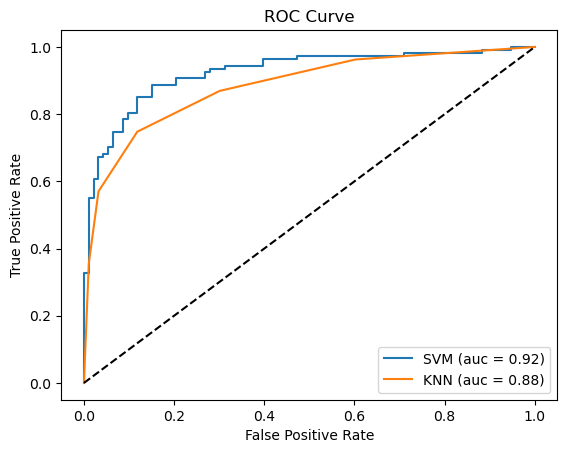

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
svm_clf = SVC(probability=True, random_state=42)
knn_clf = KNeighborsClassifier()

# Train the classifiers
svm_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test)
y_pred_knn = knn_clf.predict(X_test)

# Classification Report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# ROC and AUC
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_clf.decision_function(X_test))
auc_svm = auc(fpr_svm, tpr_svm)

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_clf.predict_proba(X_test)[:, 1])
auc_knn = auc(fpr_knn, tpr_knn)

# Plotting
plt.figure()
plt.plot(fpr_svm, tpr_svm, label=f'SVM (auc = {auc_svm:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (auc = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

